In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import platform


# unused import
#from ipywidgets import interact

sys = platform.system()
old_dir = os.getcwd()

# return a dataframe with all data since 2009
def getConcatenatedDF(who):
    os.chdir(old_dir)
    if (sys=='Darwin' or sys=='Linux'):
        os.chdir('./data/'+who)
    elif (sys =='Windows'):
        if (who == 'Applications'):
            os.chdir(r'C:\Users\Luis\desktop\INAPI\data\Applications')
        else:
            os.chdir(r'C:\Users\Luis\desktop\INAPI\data\Registers')
    
    r = os.listdir()
    df= []

    for i in r:
        df.append(pd.DataFrame(pd.read_excel(i, sheet_name=0)))

    df = pd.concat(df)

    df["Year"] = df["ApplicationNumber"].astype(str).str[0:4]
    
    #always return to the main folder to prevent errors
    os.chdir(old_dir)
    return df

def grafico(dataframe):
    sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
    ax = sns.barplot(x="ApplicationNumber", y="Applicants", data=dataframe)
    ax.set_ylabel("Solicitantes")
    ax.set_xlabel("Número de Aplicaciones")
    
def compareGraf(df1,df2):
    #use applicants as df1, and registers as df2
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(6, 15))
    sns.set_color_codes("pastel")
    sns.barplot(x="ApplicationNumber", y="Applicants", data=df1,
            label="N° de Aplicaciones", color="b")
    sns.set_color_codes("muted")
    sns.barplot(x="ApplicationNumber", y="Applicants", data=df2,
            label="N° de registros", color="b")
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="",
           xlabel="N°")
    sns.despine(left=True, bottom=True)

In [2]:
df = getConcatenatedDF('Applications')
df_macrozone = df[df["ApplicantRegion"].isin(["Maule", "Bío Bío", "Ñuble", "Libertador B. O'Higgins"])].copy()

d = df[df["Applicants"].str.contains("UNIVERSIDAD DE CONCEPCION", regex=True, na=False)]

d[d["ApplicantRegion"] == "No disponible"]

,ApplicationNumber,RegistrationNumber,Applicants,Representatives,Inventors,FilingDate,PublicationDate,RegistrationDate,ExpirationDate,Title,...,SubtypeName,Status,Country,ApplicantRegion,RepresentativeRegion,PCTApplicationDate,PCTPublicationDate,Priorities,LastUpdatedDate,Year
2909,201503128,57419.0,(CL) UNIVERSIDAD DE CONCEPCION.BR.(US) RESEARC...,(CL) SEPÚLVEDA BARRERA XIMENA,"(CL) AGUAYO HERNANDEZ, LUIS GERARDO.BR.(CL) CE...",2015-10-23 10:49:30,2016-06-17 08:53:44,2019-05-27,2035-10-23,EL COMPUESTO N-(BUTAN-2-IL)-2-[3-(1H-INDOL-3-I...,...,Patente de invención,Registrada,ESTADOS UNIDOS DE AMERICA,No disponible,No disponible,NaT,NaT,NaN,2021-05-22 06:15:06.653,2015
1285,201201376,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) SEPULVEDA BARERA XIMENA.,(99) BALLADARES VARELA EDUARDO.BR.(99) PARADA ...,2012-05-29 00:00:00,2012-11-30 16:45:44,NaT,NaT,"PROCESO PARA LA REMOCION DE ARSENICO, ANTIMONI...",...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2012
3411,201203690,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) XIMENA SEPULVEDA BARRERA.,(CL) DEFEU DELARZE EMILIO ENRIQUE.BR.(CL) FERN...,2012-12-27 10:43:53,2013-03-22 16:37:00,NaT,NaT,UN RODILLO METÁLICO REFORZADO ÚTIL PARA LA FAB...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2012
3412,201203691,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) SEPULVEDA BARRERA XIMENA,(CL) WIECHMANN FERNANDEZ EDUARDO,2012-12-27 10:45:05,2013-02-08 16:59:00,NaT,NaT,BARRA INTERCELDA QUE CONTIENE :RESISTENCIAS AL...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2012
1342,200901505,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) XIMENA SEPULVEDA BARRERA,(99) DIETTER KLATTENHOFF.BR.(99) ERICA CASTRO ...,2009-07-01 00:00:00,2009-09-25 00:00:00,NaT,NaT,FORMULACION PREBIOTICA DE USO TOPICO QUE COMPR...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2009
1347,200901511,NaN,"(CL) DURAPLAST LTDA(22,99%).BR.(CL) LABORATORI...",(CL) XIMENA SEPULVEDA BARRERA,(99) ERICA CASTRO INOSTROZA.BR.(99) MARGARITA ...,2009-07-02 00:00:00,2009-10-23 00:00:00,NaT,NaT,FORMULACION FARMACEUTICA QUE COMPRENDE CEPAS V...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2009
3494,201303741,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) XIMENA SEPULVEDA BARRERA.,(CL) FUENTES INZUNZA RODRIGO ALEJANDRO.BR.(CL)...,2013-12-27 11:31:17,2014-05-02 17:05:00,NaT,NaT,INSTRUMENTO PARA LA DETECCIÓN DE PROPIEDADES Ó...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaT,NaN,2021-05-22 06:15:06.653,2013
567,201000643,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) XIMENA SEPULVEDA BARRERA,(99) CRISTIAN GALLARDO ESCARATE.,2010-06-18 00:00:00,2010-09-03 00:00:00,NaT,NaT,KIT PARA LA IDENTIFICACION DE HIBRIDOS INTERES...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2010
635,201000718,NaN,(CL) UNIVERSIDAD DE CONCEPCION,(CL) XIMENA SEPULVEDA BARRERA,(99) Galo Cárdenas Triviño,2010-07-06 00:00:00,2010-12-31 00:00:00,NaT,NaT,POLIMERO DE QUITOSANO-ION METALICO PARA USO AG...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2010
667,201000751,NaN,(CL) CORPORACION NACIONAL DEL COBRE DE CHILE.B...,(CL) PEDRO CORTEZ NAVIA,"(99) FERNAN.BR.(99) SERGIO JARPA, CARLOS CABAL...",2010-07-13 00:00:00,2010-10-22 00:00:00,NaT,NaT,PROCESO PARA RECUPERAR MO Y OTROS METALES DESD...,...,Patente de invención,Rechazada,CHILE,No disponible,No disponible,NaT,NaN,NaN,2021-05-22 06:15:06.653,2010


In [3]:
df_macrozone["Applicants"] = df_macrozone["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")

stats = df_macrozone.groupby(["ApplicantRegion", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

population = [
    {"ApplicantRegion": "Libertador B. O'Higgins", "Population": 914555},
    {"ApplicantRegion": "Maule", "Population": 1044950},
    {"ApplicantRegion": "Ñuble", "Population": 480609},
    {"ApplicantRegion": "Bío Bío", "Population": 1556805}
]

df_population = pd.DataFrame(population)
df_population

df_agg = stats[stats["Year"].isin(["2017", "2018", "2019"])].groupby(["ApplicantRegion"]).agg({"ApplicationNumber": "mean"}).reset_index()

df_agg = df_agg.merge(df_population, on="ApplicantRegion")
df_agg["Per Capita"] = 100000 * df_agg["ApplicationNumber"] / df_agg["Population"]

df_agg

<ipython-input-3-2e5589cefa1e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_macrozone["Applicants"] = df_macrozone["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")


,ApplicantRegion,ApplicationNumber,Population,Per Capita
0,Bío Bío,56.000000,1556805,3.597111
1,Libertador B. O'Higgins,9.666667,914555,1.056980
2,Maule,8.333333,1044950,0.797486
3,Ñuble,2.333333,480609,0.485495


Text(0.5, 0, 'Región')

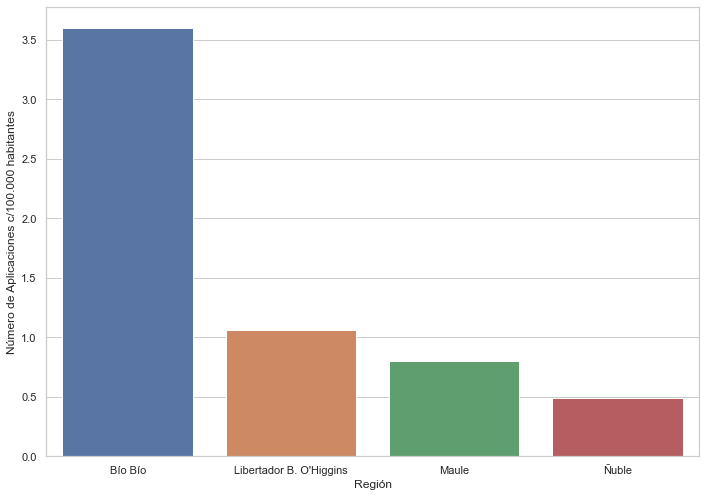

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="ApplicantRegion", y="Per Capita", data=df_agg)
ax.set_ylabel("Número de Aplicaciones c/100.000 habitantes")
ax.set_xlabel("Región")

In [5]:
#Se agrupan las solicitudes por solicitante y año, posteriormente obtenermos los solicitantes que por año realizaron más solicitudes

df_macrozone2 = df_macrozone

df_macrozone2['Applicants'] = df_macrozone2["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")

stats2 = df_macrozone2.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

df_top = stats2.sort_values('ApplicationNumber', ascending=False).head(20)





<ipython-input-5-5a0b1899fb90>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_macrozone2['Applicants'] = df_macrozone2["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")


In [6]:
#Se realiza un seguimiento histórico a cada solicitante 

udec = df_macrozone2[df_macrozone2["Applicants"].str.contains("UNIVERSIDAD DE CONCEPCION", regex=True, na=False)]

udec =  udec.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

udec = udec.sort_values('Year', ascending=True)


ubb = df_macrozone2[df_macrozone2["Applicants"].str.contains("UNIVERSIDAD DEL BIO BIO", regex=True, na=False)]

ubb =  ubb.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

ubb = ubb.sort_values('Year', ascending=True)



contenedores_san_fernando = df_macrozone2[df_macrozone2["Applicants"].str.contains("CONTENEDORES SAN FERNANDO SPA", regex=True, na=False)]

contenedores_san_fernando =  contenedores_san_fernando.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

contenedores_san_fernando = contenedores_san_fernando.sort_values('Year', ascending=True)




mario_mendez = df_macrozone2[df_macrozone2["Applicants"].str.contains("MARIO GUERRERO MENDEZ", regex=True, na=False)]

mario_mendez =  mario_mendez.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

mario_mendez = mario_mendez.sort_values('Year', ascending=True)




victor_rosales = df_macrozone2[df_macrozone2["Applicants"].str.contains("VICTOR MANUEL ROSALES ITURRA", regex=True, na=False)]

victor_rosales =  victor_rosales.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

victor_rosales = victor_rosales.sort_values('Year', ascending=True)



In [7]:
'''Replace this code with getConcatenatedDF() and 'Registers' as argument '''
#os.chdir(r'C:\Users\Luis\desktop\INAPI\data\Registers')
#r = os.listdir()

#df = []

#for i in r:
#    df.append(pd.DataFrame(pd.read_excel(i, sheet_name=0)))
    
#df = pd.concat(df)

#df["Year"] = df["ApplicationNumber"].astype(str).str[0:4]


df = getConcatenatedDF('Registers')

df_macrozone_registers = df[df["ApplicantRegion"].isin(["Maule", "Bío Bío", "Ñuble", "Libertador B. O'Higgins"])].copy()

df_macrozone_registers['Applicants'] = df_macrozone_registers["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")

stats_registers = df_macrozone_registers.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()


<ipython-input-7-af272063d7ea>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_macrozone_registers['Applicants'] = df_macrozone_registers["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")


In [8]:
#Segumiento histórico de las patentes registradas

udec_r = df_macrozone_registers[df_macrozone_registers["Applicants"].str.contains("UNIVERSIDAD DE CONCEPCION", regex=True, na=False)]

udec_r =  udec_r.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

udec_r = udec_r.sort_values('Year', ascending=True)



ubb_r = df_macrozone_registers[df_macrozone_registers["Applicants"].str.contains("UNIVERSIDAD DEL BIO BIO", regex=True, na=False)]

ubb_r =  ubb_r.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

ubb_r = ubb_r.sort_values('Year', ascending=True)



contenedores_san_fernando_r = df_macrozone_registers[df_macrozone_registers["Applicants"].str.contains("CONTENEDORES SAN FERNANDO SPA", regex=True, na=False)]

contenedores_san_fernando_r =  contenedores_san_fernando_r.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

contenedores_san_fernando_r = contenedores_san_fernando_r.sort_values('Year', ascending=True)


mario_mendez_r = df_macrozone_registers[df_macrozone_registers["Applicants"].str.contains("MARIO GUERRERO MENDEZ", regex=True, na=False)]

mario_mendez_r =  mario_mendez_r.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

mario_mendez_r = mario_mendez_r.sort_values('Year', ascending=True)




victor_rosales_r = df_macrozone_registers[df_macrozone_registers["Applicants"].str.contains("VICTOR MANUEL ROSALES ITURRA", regex=True, na=False)]

victor_rosales_r =  victor_rosales_r.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

victor_rosales_r = victor_rosales_r.sort_values('Year', ascending=True)



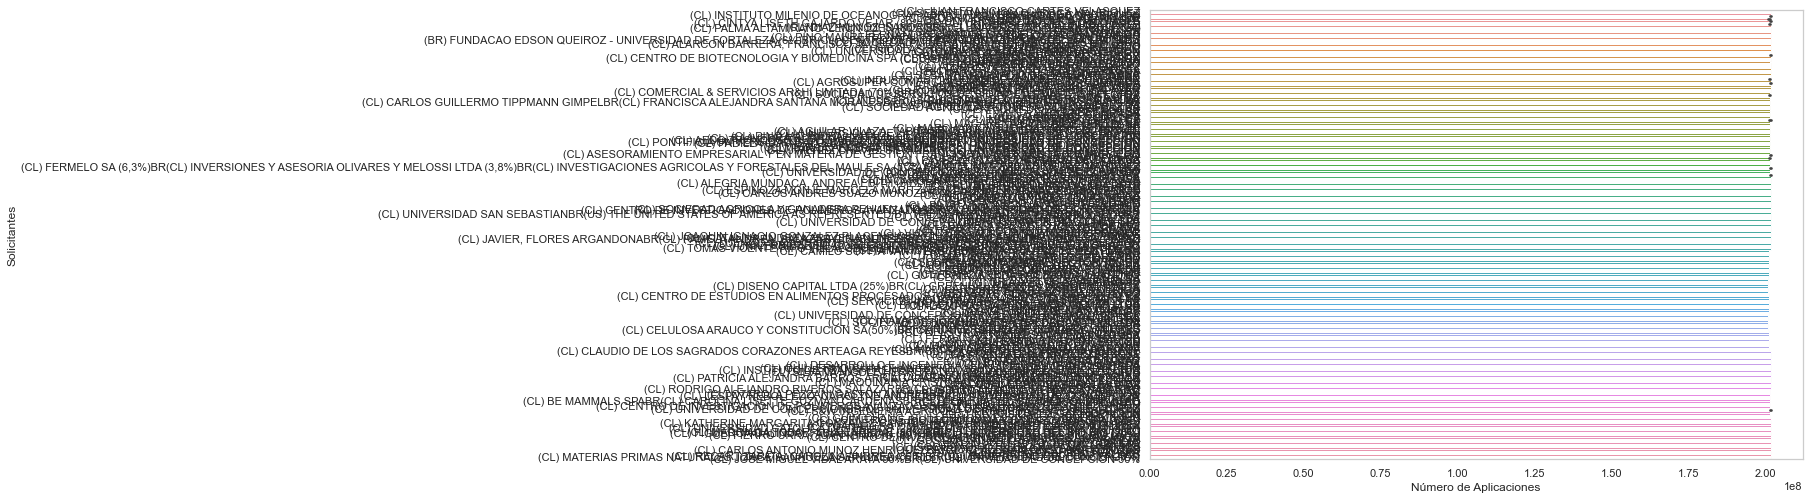

In [9]:
#using function to compare applications vs registers

# Too much data to deploy

grafico(df_macrozone)

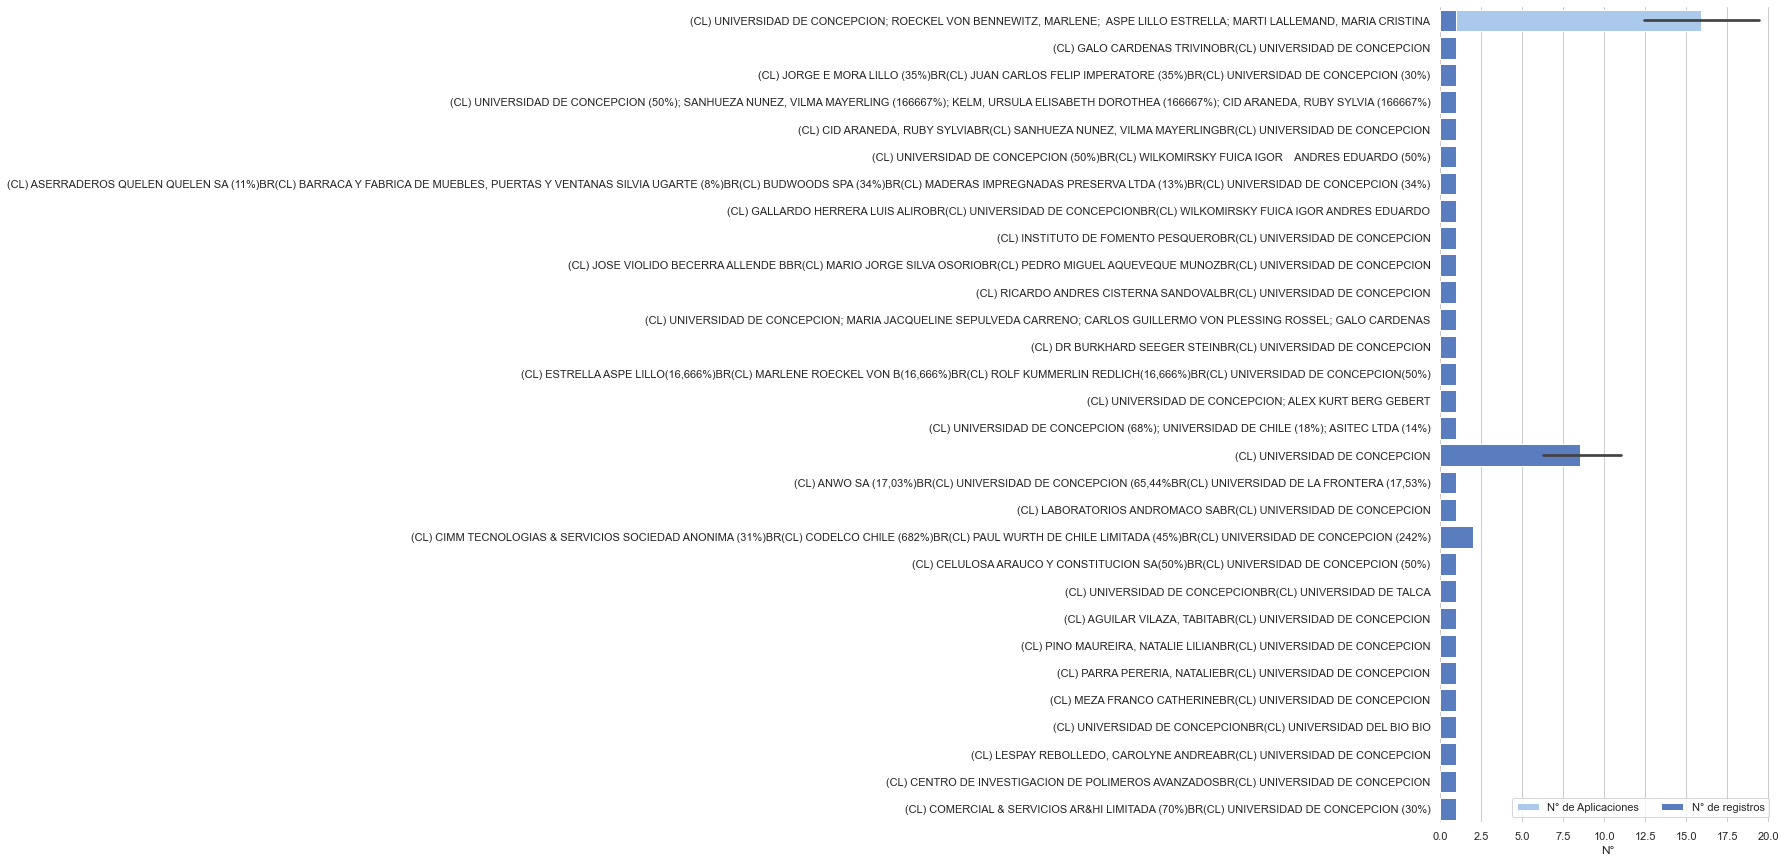

In [10]:
compareGraf(udec,udec_r)

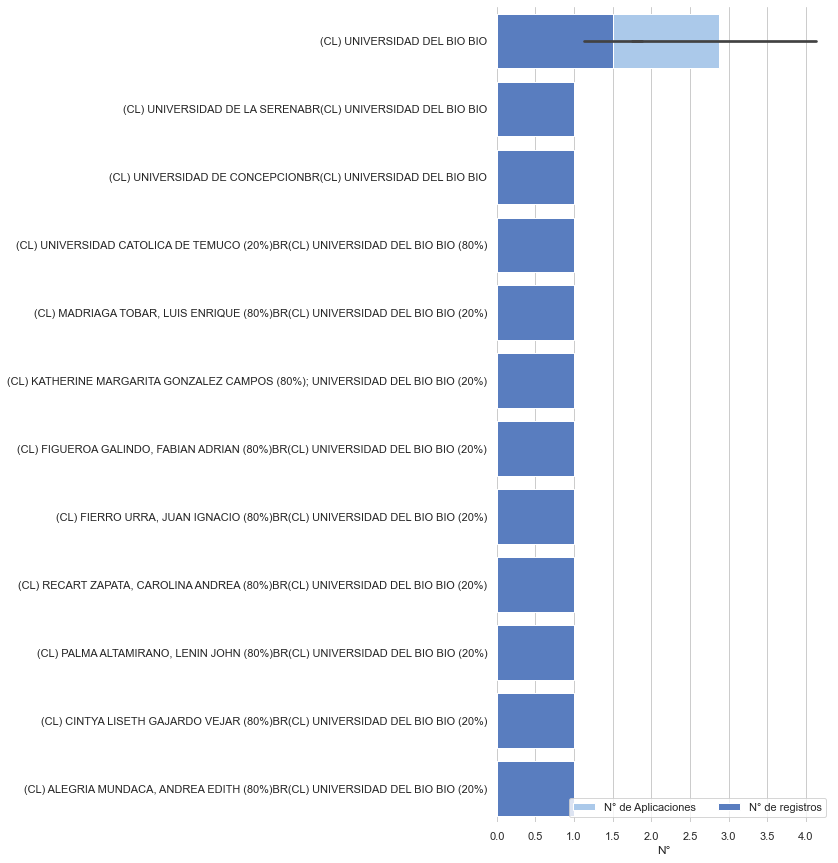

In [11]:
compareGraf(ubb,ubb_r)

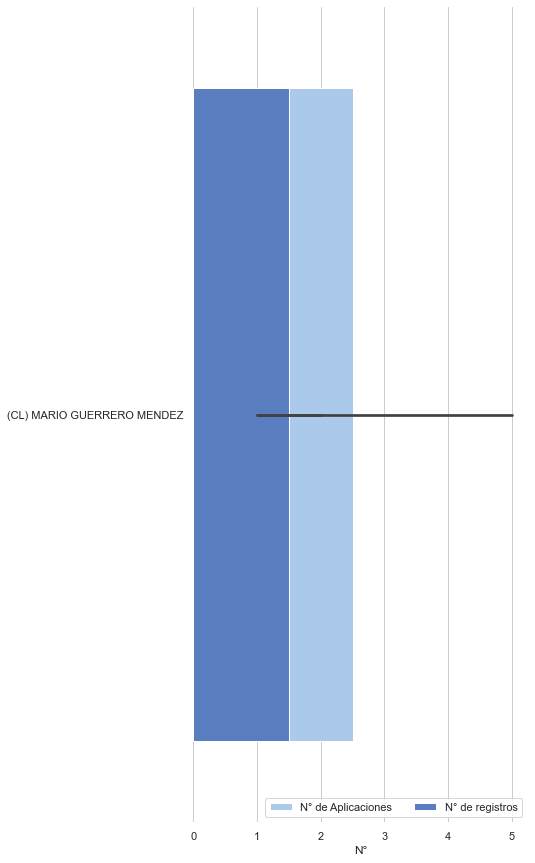

In [12]:
compareGraf(mario_mendez,mario_mendez_r)

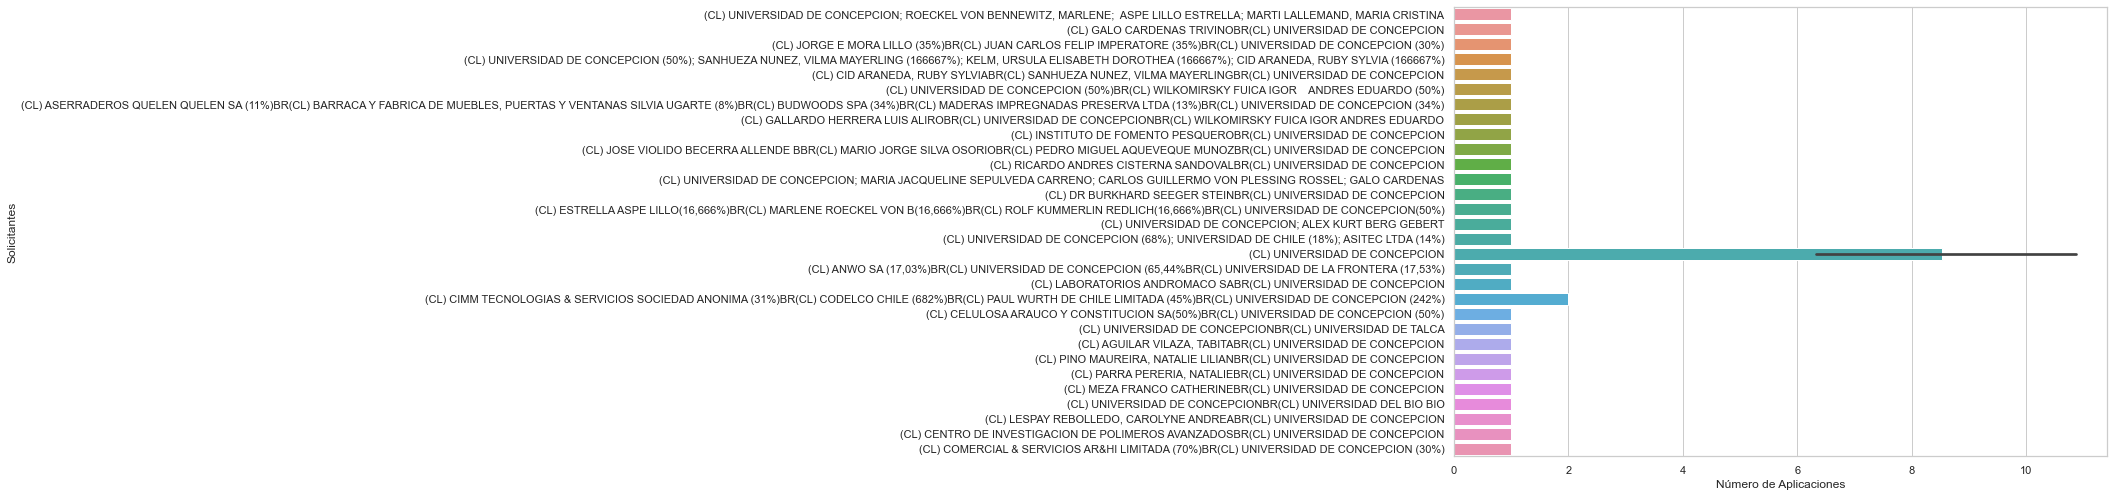

In [13]:
#Gráfico de registros ubb
grafico(udec_r)

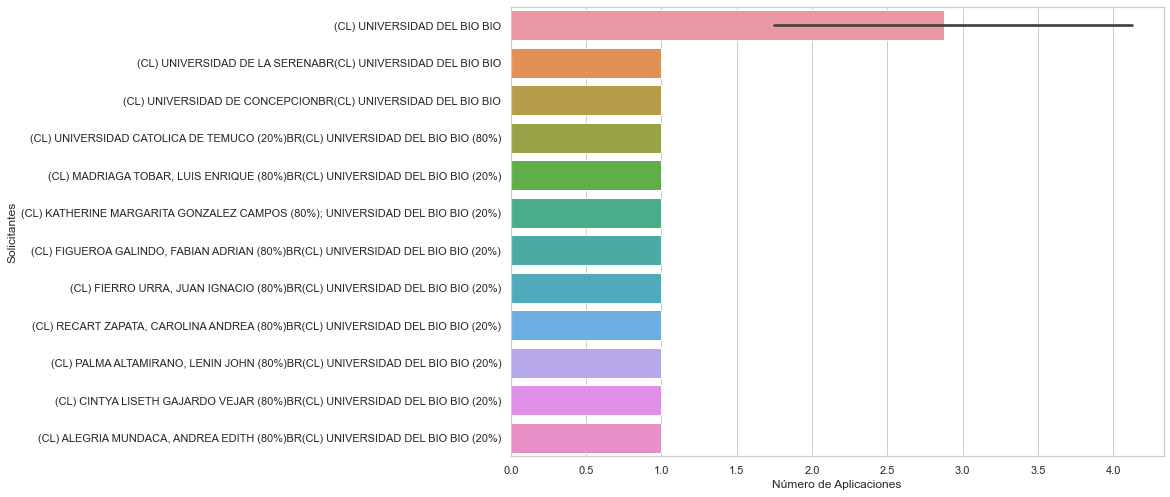

In [14]:
#Gráfico solicitudes ubb
grafico(ubb)

In [15]:
# This cell have a several conflict with previous cells
ubb_r.rename(columns={'ApplicationNumber':'ApplicationNumber_R'},
               inplace=True)

df_agg = df_agg.merge(df_population, on="ApplicantRegion")

ubb = ubb.merge(ubb_r, on =  'Year')

In [16]:
ubb

,Applicants_x,Year,ApplicationNumber,Applicants_y,ApplicationNumber_R
0,(CL) UNIVERSIDAD DEL BIO BIO,2012,1,(CL) UNIVERSIDAD DEL BIO BIO,1
1,(CL) UNIVERSIDAD DEL BIO BIO,2014,1,(CL) UNIVERSIDAD DEL BIO BIO,1
2,(CL) UNIVERSIDAD DEL BIO BIO,2014,1,(CL) UNIVERSIDAD DE LA SERENABR(CL) UNIVERSIDA...,1
3,(CL) UNIVERSIDAD DE LA SERENABR(CL) UNIVERSIDA...,2014,1,(CL) UNIVERSIDAD DEL BIO BIO,1
4,(CL) UNIVERSIDAD DE LA SERENABR(CL) UNIVERSIDA...,2014,1,(CL) UNIVERSIDAD DE LA SERENABR(CL) UNIVERSIDA...,1
...,...,...,...,...,...
67,(CL) CINTYA LISETH GAJARDO VEJAR (80%)BR(CL) U...,2018,1,(CL) CINTYA LISETH GAJARDO VEJAR (80%)BR(CL) U...,1
68,"(CL) ALEGRIA MUNDACA, ANDREA EDITH (80%)BR(CL)...",2019,1,"(CL) ALEGRIA MUNDACA, ANDREA EDITH (80%)BR(CL)...",1
69,"(CL) ALEGRIA MUNDACA, ANDREA EDITH (80%)BR(CL)...",2019,1,(CL) UNIVERSIDAD DEL BIO BIO,1
70,(CL) UNIVERSIDAD DEL BIO BIO,2019,6,"(CL) ALEGRIA MUNDACA, ANDREA EDITH (80%)BR(CL)...",1


In [20]:
print(len(df))
print(len(df['ApplicationNumber'].unique()))

23073
23073
